In [12]:
%pwd

'/Users/xiaoyuzhao/Downloads/5_Combinatorial_CROP_seq/CROP_Python'

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.4f}'.format
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
%load_ext autoreload
%load_ext rpy2.ipython
%autoreload 2
%matplotlib inline

from perturbseq import *
from diffexpr import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# I. Clustering and UMAP on mean expression

   **1. Cluter on mean expression usinng HDBSCAN.**
   
   **2. Visulize clusters on 2D plan using UMAP.**


In [14]:
pop1 = CellPopulation.from_hdf('./sequencing/outs_S1/final_pop_with_normalized_S1.hdf')
pop2 = CellPopulation.from_hdf('./sequencing/outs_S2/final_pop_with_normalized_S2.hdf')
pop3 = CellPopulation.from_hdf('./sequencing/outs_S3/final_pop_with_normalized_S3.hdf')
pop4 = CellPopulation.from_hdf('./sequencing/outs_S4/final_pop_with_normalized_S4.hdf')

Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 3.1161997318267822s.
Done.
Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 4.795015096664429s.
Done.
Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 3.5623459815979004s.
Done.
Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 4.108959913253784s.
Done.


In [15]:
mean_pop1 = CellPopulation.from_hdf('./sequencing/outs_S1/mean_pop_with_normalized_S1.hdf')
mean_pop2 = CellPopulation.from_hdf('./sequencing/outs_S2/mean_pop_with_normalized_S2.hdf')
mean_pop3 = CellPopulation.from_hdf('./sequencing/outs_S3/mean_pop_with_normalized_S3.hdf')
mean_pop4 = CellPopulation.from_hdf('./sequencing/outs_S4/mean_pop_with_normalized_S4.hdf')

Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 0.18258190155029297s.
Done.
Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 0.18541908264160156s.
Done.
Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 0.18633699417114258s.
Done.
Loading matrix...
Loading normalized matrix...
Loading metadata...
Done in 0.18784117698669434s.
Done.


**------------------------------Sample 2: S2_D6_full (Cells in full medium at Day6)-----------------------------------**

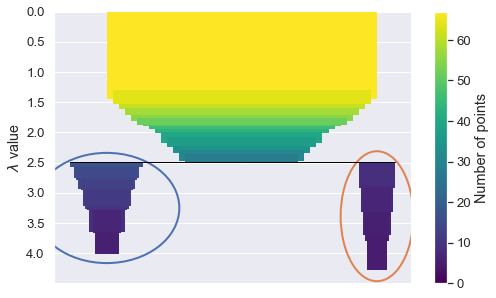

In [21]:
import hdbscan
clusterer = hdbscan.HDBSCAN(metric='correlation',
                            min_cluster_size=4,
                            min_samples=1,
                            cluster_selection_method='eom',
                            alpha=1.)
data = mean_pop2.where(genes='mean > 0.25 ',
                      normalized=True,
                      gene_names=True)
data = data/data.std()
clusterer.fit(data)
plt.figure(figsize=[8,5])
tree = clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 40))


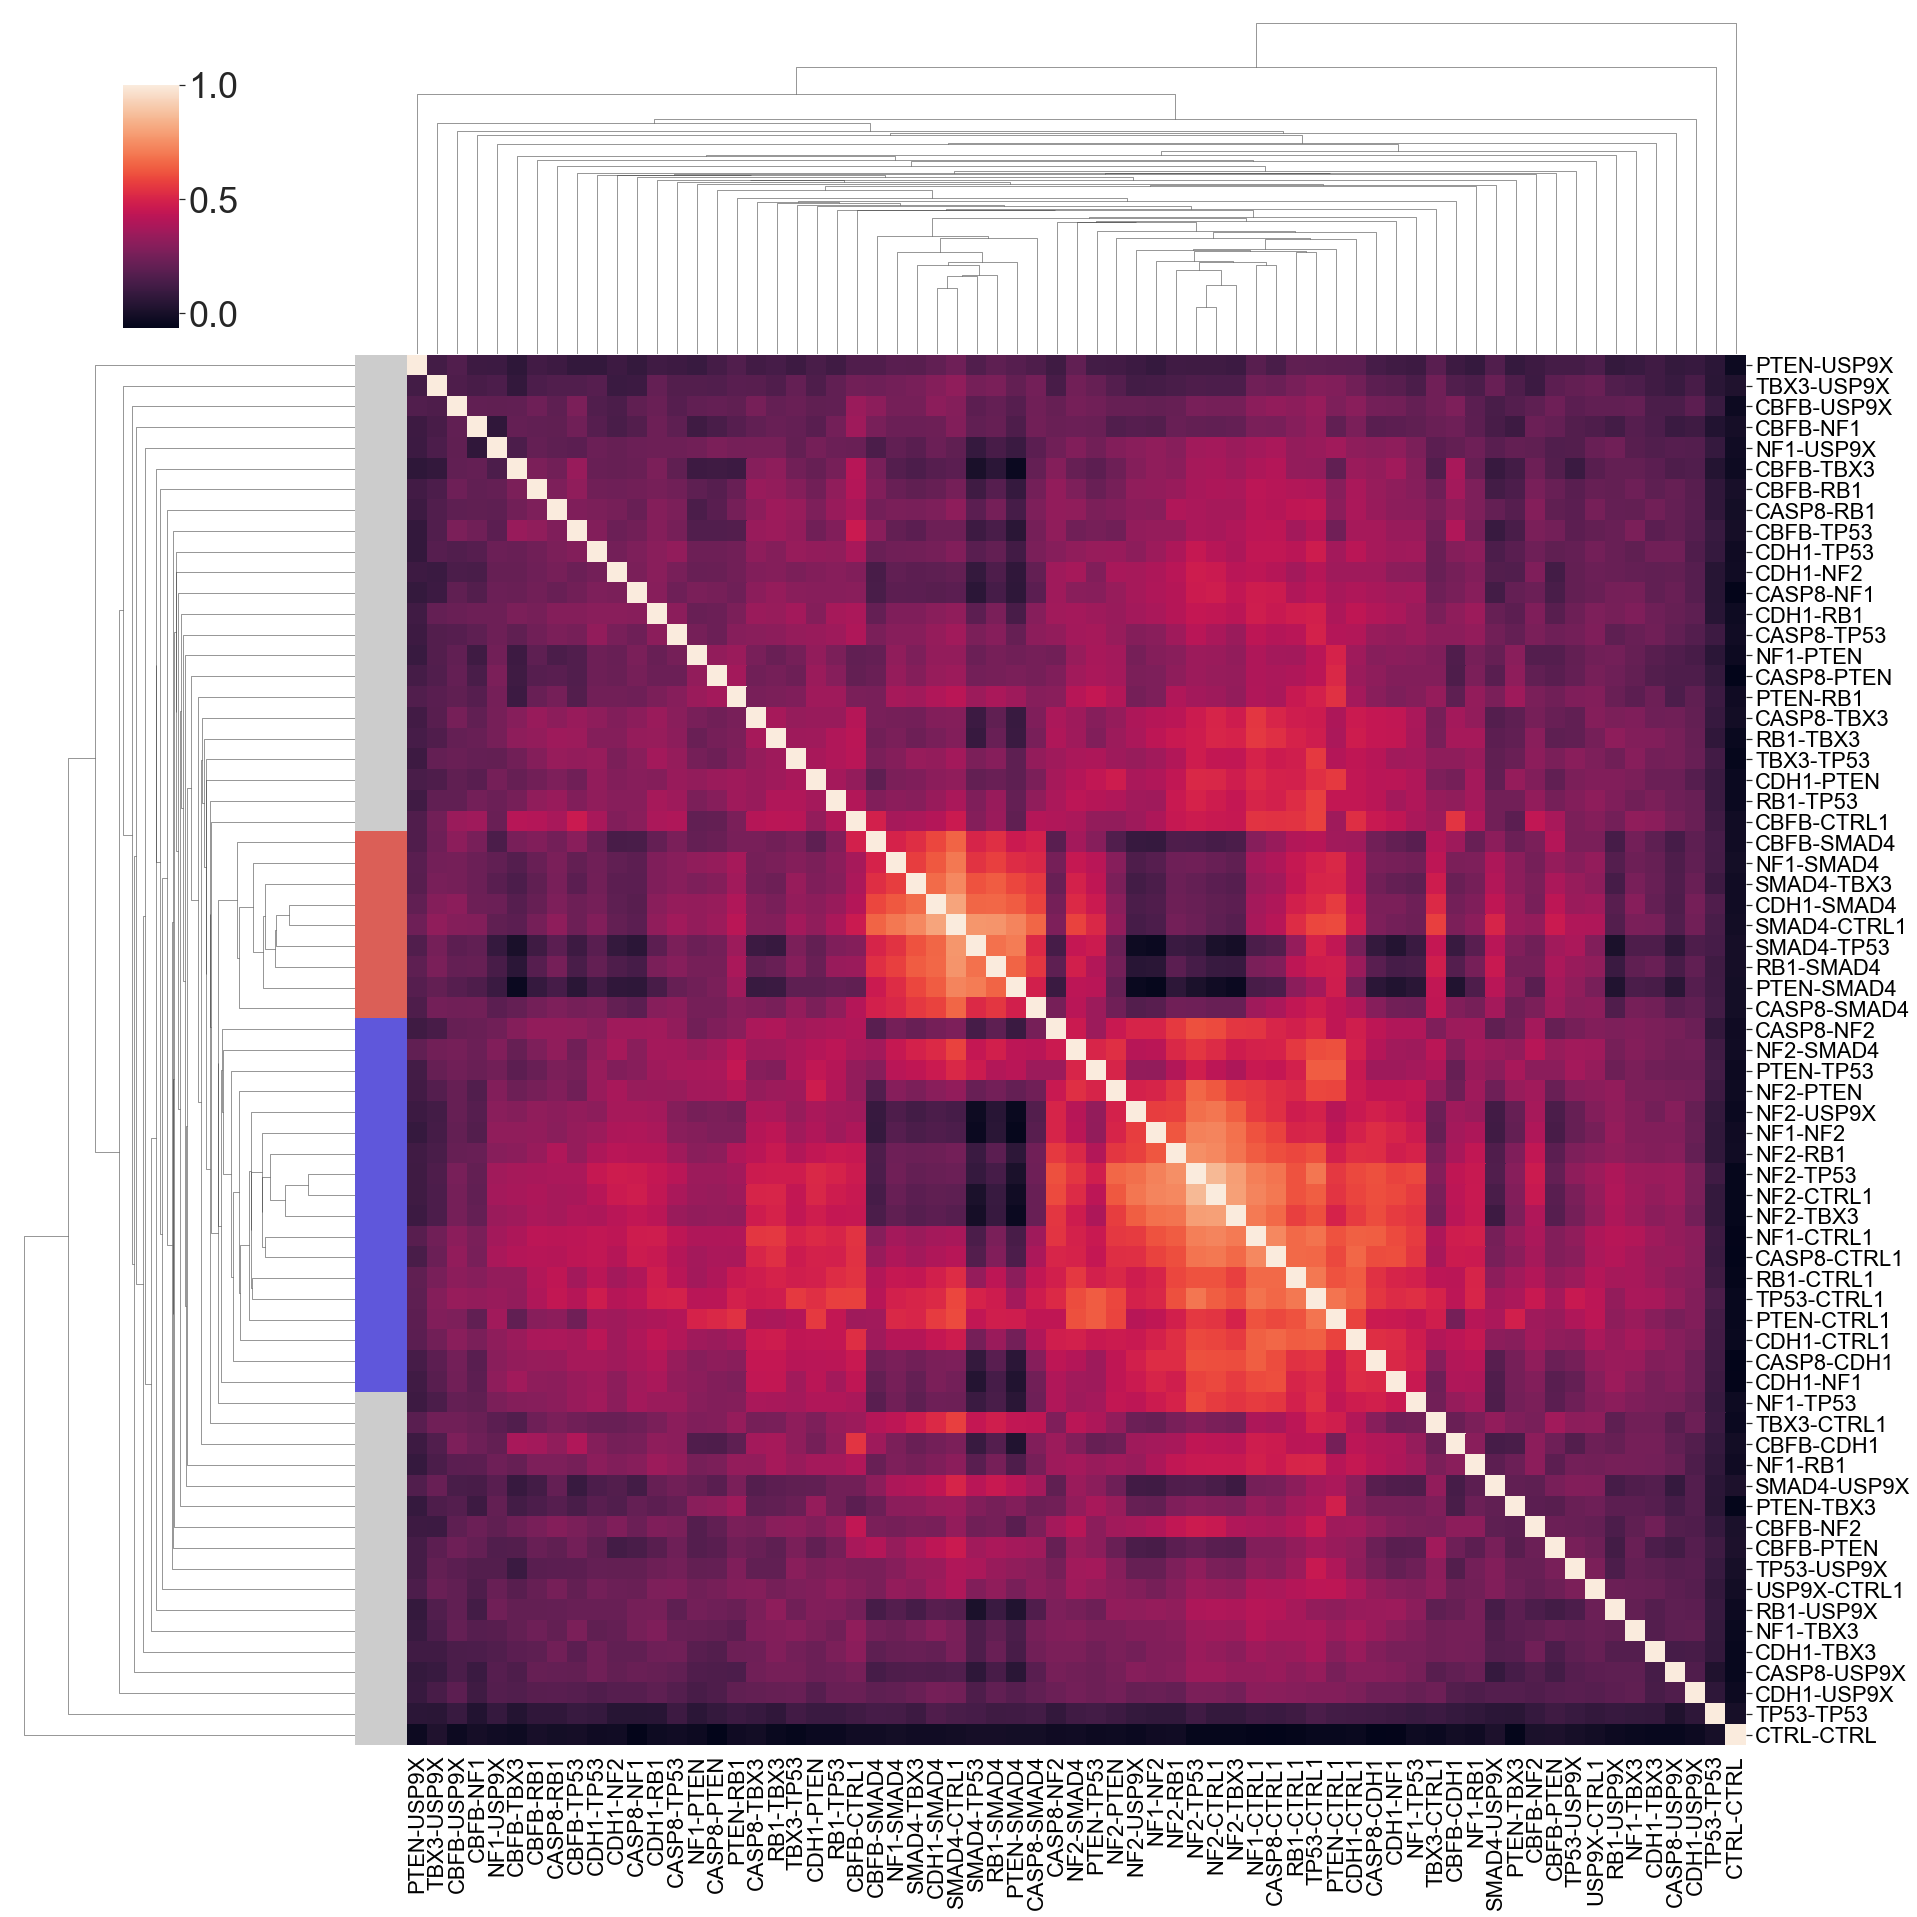

In [23]:
#**------------------------------------------Heatmap of clustering---------------------------------------------------**
from scipy.cluster.hierarchy import leaves_list, optimal_leaf_ordering
from scipy.spatial.distance import pdist, squareform
from sklearn.utils import shuffle
from matplotlib.colors import to_hex
D_corr = pdist(data, 'correlation')
Z_corr = clusterer.single_linkage_tree_.to_numpy()
Z_corr = optimal_leaf_ordering(Z_corr, D_corr)
labels = pd.Series(clusterer.labels_, index=data.index).sort_values()
clusters_in_order = labels.loc[data.index.values[leaves_list(Z_corr)]]

cluster_colors = list(map(to_hex, sns.color_palette('hls', labels.max()+2)))
cluster_colors = shuffle(cluster_colors)
cluster_color_mapper = dict(zip(sorted(labels.unique()), cluster_colors))
cluster_color_mapper[-1] = '#cccccc'
cluster_colors = clusters_in_order.map(lambda x: cluster_color_mapper[x])
sns.set(font_scale=1.2)
g = sns.clustermap(data.T.corr(),
               row_linkage=Z_corr, 
               col_linkage=Z_corr,
                   
               robust=False, figsize=[26,26], row_colors=cluster_colors)
#g.cax.set_size(0.5)
#g.ax_row_dendrogram.set_visible(False)
#g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([.07, .82, .03, .13])
g.cax.tick_params(labelsize=36)
plt.setp(g.ax_heatmap.get_xticklabels(), fontsize = 22, color = "black")
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize = 22, color = "black")
#heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30) 
plt.savefig('./sequencing/outs_S2/results/hdbscan_cluster_UMAP/heatmap_hdbscan_mean_expression.png', dpi=300)

#Add cluster labels into mean_pop2.cells
mean_pop2.cells["HDBSCAN_cluster_labels"] = clusterer.labels_

In [24]:
mean_pop2.cells

,num_cells,UMI_mean,num_targets,fitness1,fitness2,fitness,knock_outs,first_target,second_target,perturbed,DESeq2_de,HDBSCAN_cluster_labels
CASP8-CDH1,52,12838.0962,2,0.0091,0.0094,0.0093,DKO,CASP8,CDH1,CASP8-CDH1,29.0000,0
CASP8-CTRL1,208,11322.2740,1,0.0169,0.0221,0.0195,SKO,CASP8,CTRL1,CASP8-CTRL1,67.0000,0
CASP8-NF1,19,12457.7895,2,0.0096,-0.0056,0.0020,DKO,CASP8,NF1,CASP8-NF1,9.0000,-1
CASP8-NF2,46,11657.4348,2,0.0336,0.0291,0.0313,DKO,CASP8,NF2,CASP8-NF2,37.0000,0
CASP8-PTEN,24,12868.9583,2,0.0391,0.0318,0.0354,DKO,CASP8,PTEN,CASP8-PTEN,8.0000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
TBX3-USP9X,17,15144.7059,2,0.0095,-0.0779,-0.0342,DKO,TBX3,USP9X,TBX3-USP9X,0.0000,-1
TP53-CTRL1,406,12335.7438,1,0.0183,0.0266,0.0225,SKO,TP53,CTRL1,TP53-CTRL1,47.0000,0
TP53-TP53,1,26461.0000,2,nan,nan,nan,DKO,TP53,TP53,TP53-TP53,0.0000,-1
TP53-USP9X,30,11906.8667,2,-0.0521,-0.0558,-0.0540,DKO,TP53,USP9X,TP53-USP9X,8.0000,-1


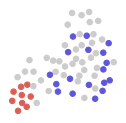

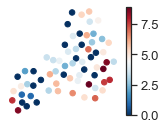

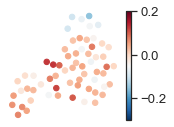

In [25]:
from umap import UMAP
sns.set(font_scale=1.2)
transformer = UMAP(metric='correlation',
                   n_neighbors=10,
                   min_dist=1,
                   spread=2,
                   random_state=4530)
coords = pd.DataFrame(transformer.fit_transform(data),
                      index=data.index,
                      columns=['x', 'y'])
coords['color'] = cluster_colors
coords['cluster'] = clusters_in_order
#coords.to_csv('./data_sharing/optimal_umap_layout.csv')
sns.set_style('white')
plt.figure(figsize=[2,2])
cg1 = plt.scatter(coords['x'], coords['y'], c=coords['color'], s=30)
plt.box(False)
plt.axis('off');
plt.savefig('./sequencing/outs_S2/results/hdbscan_cluster_UMAP/UMAP_cluster_mean_expression.png', dpi=300)

#-----------------------------Number of DEGs mapping on UMAP clusters-------------------------------------  
coords['transcription'] = np.log2(mean_pop2.cells['DESeq2_de']+1)
coords.head()
plt.figure(figsize=[2.5,2])
cg2 = plt.scatter(coords['x'],
            coords['y'],
            c=coords['transcription'],
            cmap=plt.cm.get_cmap('RdBu_r'),
            s=30)#, vmin=0, vmax= 7)
plt.colorbar()
plt.axis('off');
#plt.title('fitness');
#plt.text(9, 17, "fitness", fontsize = 14)
plt.savefig('./sequencing/outs_S2/results/hdbscan_cluster_UMAP/UMAP_num_of_DEGs_mean_expression.png', dpi=300)

#-----------------------------Fitness mapping on UMAP clusters-------------------------------------
coords['fitness'] = mean_pop2.cells['fitness']
coords['fitness']
coords.head()
plt.figure(figsize=[2.5,2])
cg2 = plt.scatter(coords['x'],
            coords['y'],
            c=coords['fitness'],
            cmap=plt.cm.get_cmap('RdBu_r'),
            s=30, vmin=-0.3, vmax=0.2)
plt.colorbar()
plt.axis('off');
#plt.title('fitness');
#plt.text(9, 17, "fitness", fontsize = 14)
plt.savefig('./sequencing/outs_S2/results/hdbscan_cluster_UMAP/UMAP_fitness_mean_expression.png', dpi=300)



**------------------------------Sample 3: S3_D6_tgf (Cells in TGFbeta1 medium at Day6)-----------------------------------**

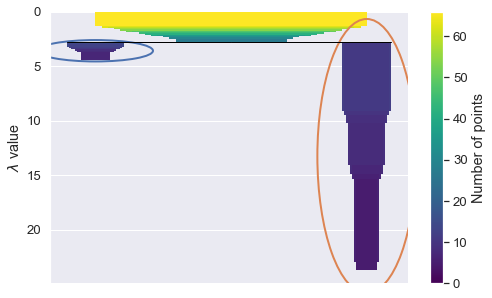

In [36]:
import hdbscan
clusterer = hdbscan.HDBSCAN(metric='correlation',
                            min_cluster_size=4,
                            min_samples=1,
                            cluster_selection_method='eom',
                            alpha=1.)
data = mean_pop3.where(genes='mean > 0.25 ',
                      normalized=True,
                      gene_names=True)
data = data/data.std()
clusterer.fit(data)
 
plt.figure(figsize=[8,5])
tree = clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 40))

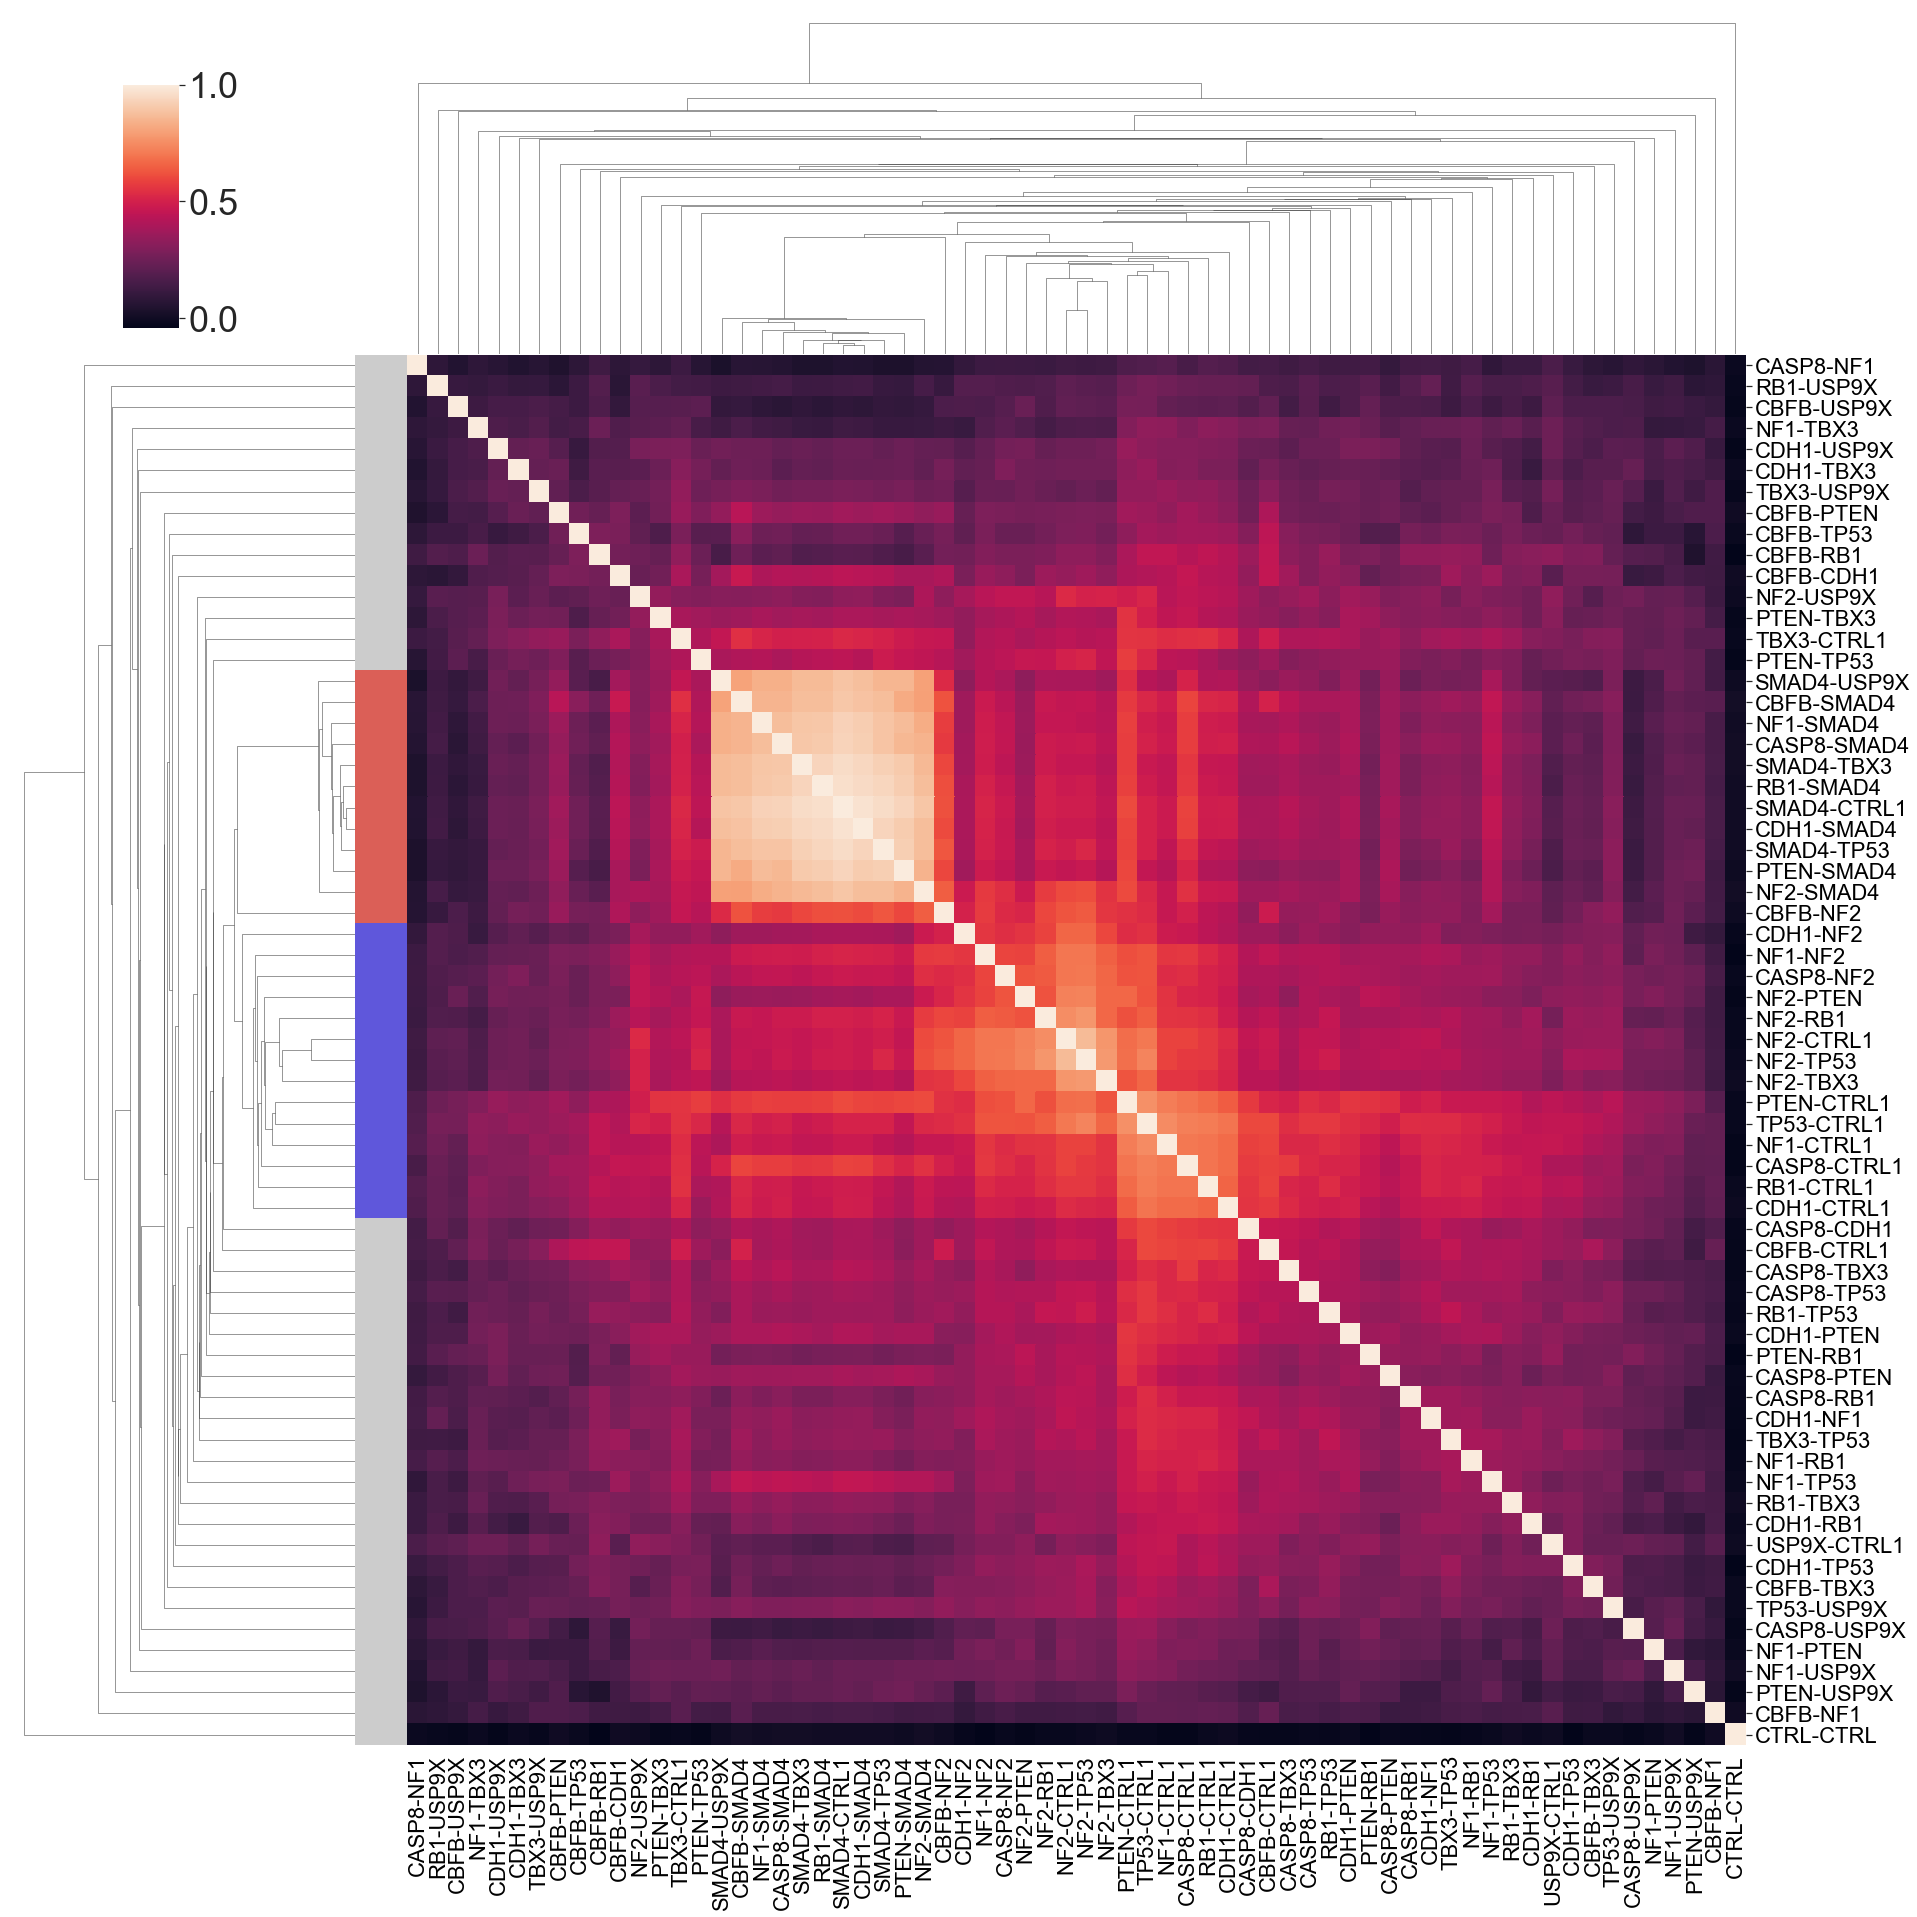

In [37]:
#**------------------------------------------Heatmap of clustering---------------------------------------------------**
from scipy.cluster.hierarchy import leaves_list, optimal_leaf_ordering
from scipy.spatial.distance import pdist, squareform
from sklearn.utils import shuffle
from matplotlib.colors import to_hex

D_corr = pdist(data, 'correlation')
Z_corr = clusterer.single_linkage_tree_.to_numpy()
Z_corr = optimal_leaf_ordering(Z_corr, D_corr)
labels = pd.Series(clusterer.labels_, index=data.index).sort_values()
clusters_in_order = labels.loc[data.index.values[leaves_list(Z_corr)]]

cluster_colors = list(map(to_hex, sns.color_palette('hls', labels.max()+2)))
cluster_colors = shuffle(cluster_colors)
cluster_color_mapper = dict(zip(sorted(labels.unique()), cluster_colors))
cluster_color_mapper[-1] = '#cccccc'
cluster_colors = clusters_in_order.map(lambda x: cluster_color_mapper[x])
sns.set(font_scale=1.2)
g = sns.clustermap(data.T.corr(),
               row_linkage=Z_corr, col_linkage=Z_corr,
               robust=False, figsize=[26,26], row_colors=cluster_colors)
#g.cax.set_size(0.5)
#g.ax_row_dendrogram.set_visible(False)
#g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([.07, .82, .03, .13])
g.cax.tick_params(labelsize=36)
plt.setp(g.ax_heatmap.get_xticklabels(), fontsize = 22, color = "black")
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize = 22, color = "black")
plt.savefig('./sequencing/outs_S3/results/hdbscan_cluster_UMAP/heatmap_hdbscan_mean_expression.png', dpi=300)

#Add cluster labels into mean_pop3.cells
mean_pop3.cells["HDBSCAN_cluster_labels"] = clusterer.labels_

In [38]:
np.unique(cluster_colors)

array(['#5f57db', '#cccccc', '#db5f57'], dtype=object)

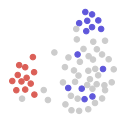

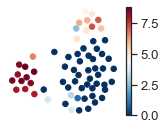

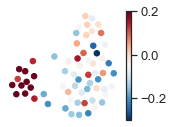

In [39]:
from umap import UMAP
sns.set(font_scale=1.2)
transformer = UMAP(metric='correlation',
                   n_neighbors=10,
                   min_dist=1,
                   spread=2,
                   random_state=45300)
coords = pd.DataFrame(transformer.fit_transform(data),
                      index=data.index,
                      columns=['x', 'y'])
coords['color'] = cluster_colors
coords['cluster'] = clusters_in_order
#coords.to_csv('./data_sharing/optimal_umap_layout.csv')
sns.set_style('white')
plt.figure(figsize=[2,2])
cg1 = plt.scatter(coords['x'], coords['y'], c=coords['color'], s=30)
plt.box(False)
plt.axis('off');
plt.savefig('./sequencing/outs_S3/results/hdbscan_cluster_UMAP/UMAP_cluster_mean_expression.png', dpi=300)

#-----------------------------Num of DEGs mapping on UMAP clusters-------------------------------------
coords['transcription'] = np.log2(mean_pop3.cells['DESeq2_de']+1)
coords.head()
plt.figure(figsize=[2.5,2])
cg2 = plt.scatter(coords['x'],
            coords['y'],
            c=coords['transcription'],
            cmap=plt.cm.get_cmap('RdBu_r'),
            s=30)#, vmin=0, vmax=7)
plt.colorbar()
plt.axis('off');
#plt.title('fitness');
#plt.text(9, 17, "fitness", fontsize = 14)
plt.savefig('./sequencing/outs_S3/results/hdbscan_cluster_UMAP/UMAP_num_of_DEGs_mean_expression.png', dpi=300)

#-----------------------------Fitness mapping on UMAP clusters-------------------------------------
coords['fitness'] = mean_pop3.cells['fitness']
coords['fitness']
coords.head()
plt.figure(figsize=[2.5,2.])
cg2 = plt.scatter(coords['x'],
            coords['y'],
            c=coords['fitness'],
            cmap=plt.cm.get_cmap('RdBu_r'),
            s=30, vmin=-0.3, vmax=0.2)
plt.colorbar()
plt.axis('off');
#plt.title('fitness');
#plt.text(17.2, 2, "fitness", fontsize = 14)
plt.savefig('./sequencing/outs_S3/results/hdbscan_cluster_UMAP/UMAP_fitness_mean_expression.png', dpi=300)

**------------------------------Sample 4: S4_D6_min (Cells in minimal medium at Day6)-----------------------------------**

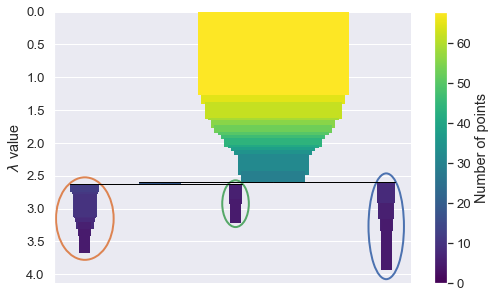

In [51]:
import hdbscan
clusterer = hdbscan.HDBSCAN(metric='correlation',
                            min_cluster_size=4,
                            min_samples=1,
                            cluster_selection_method='eom',
                            alpha=1.)

data = mean_pop4.where(genes='mean > 0.25 ',
                      normalized=True,
                      gene_names=True)
data = data/data.std()
clusterer.fit(data)
 
plt.figure(figsize=[8,5])
tree = clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 40))


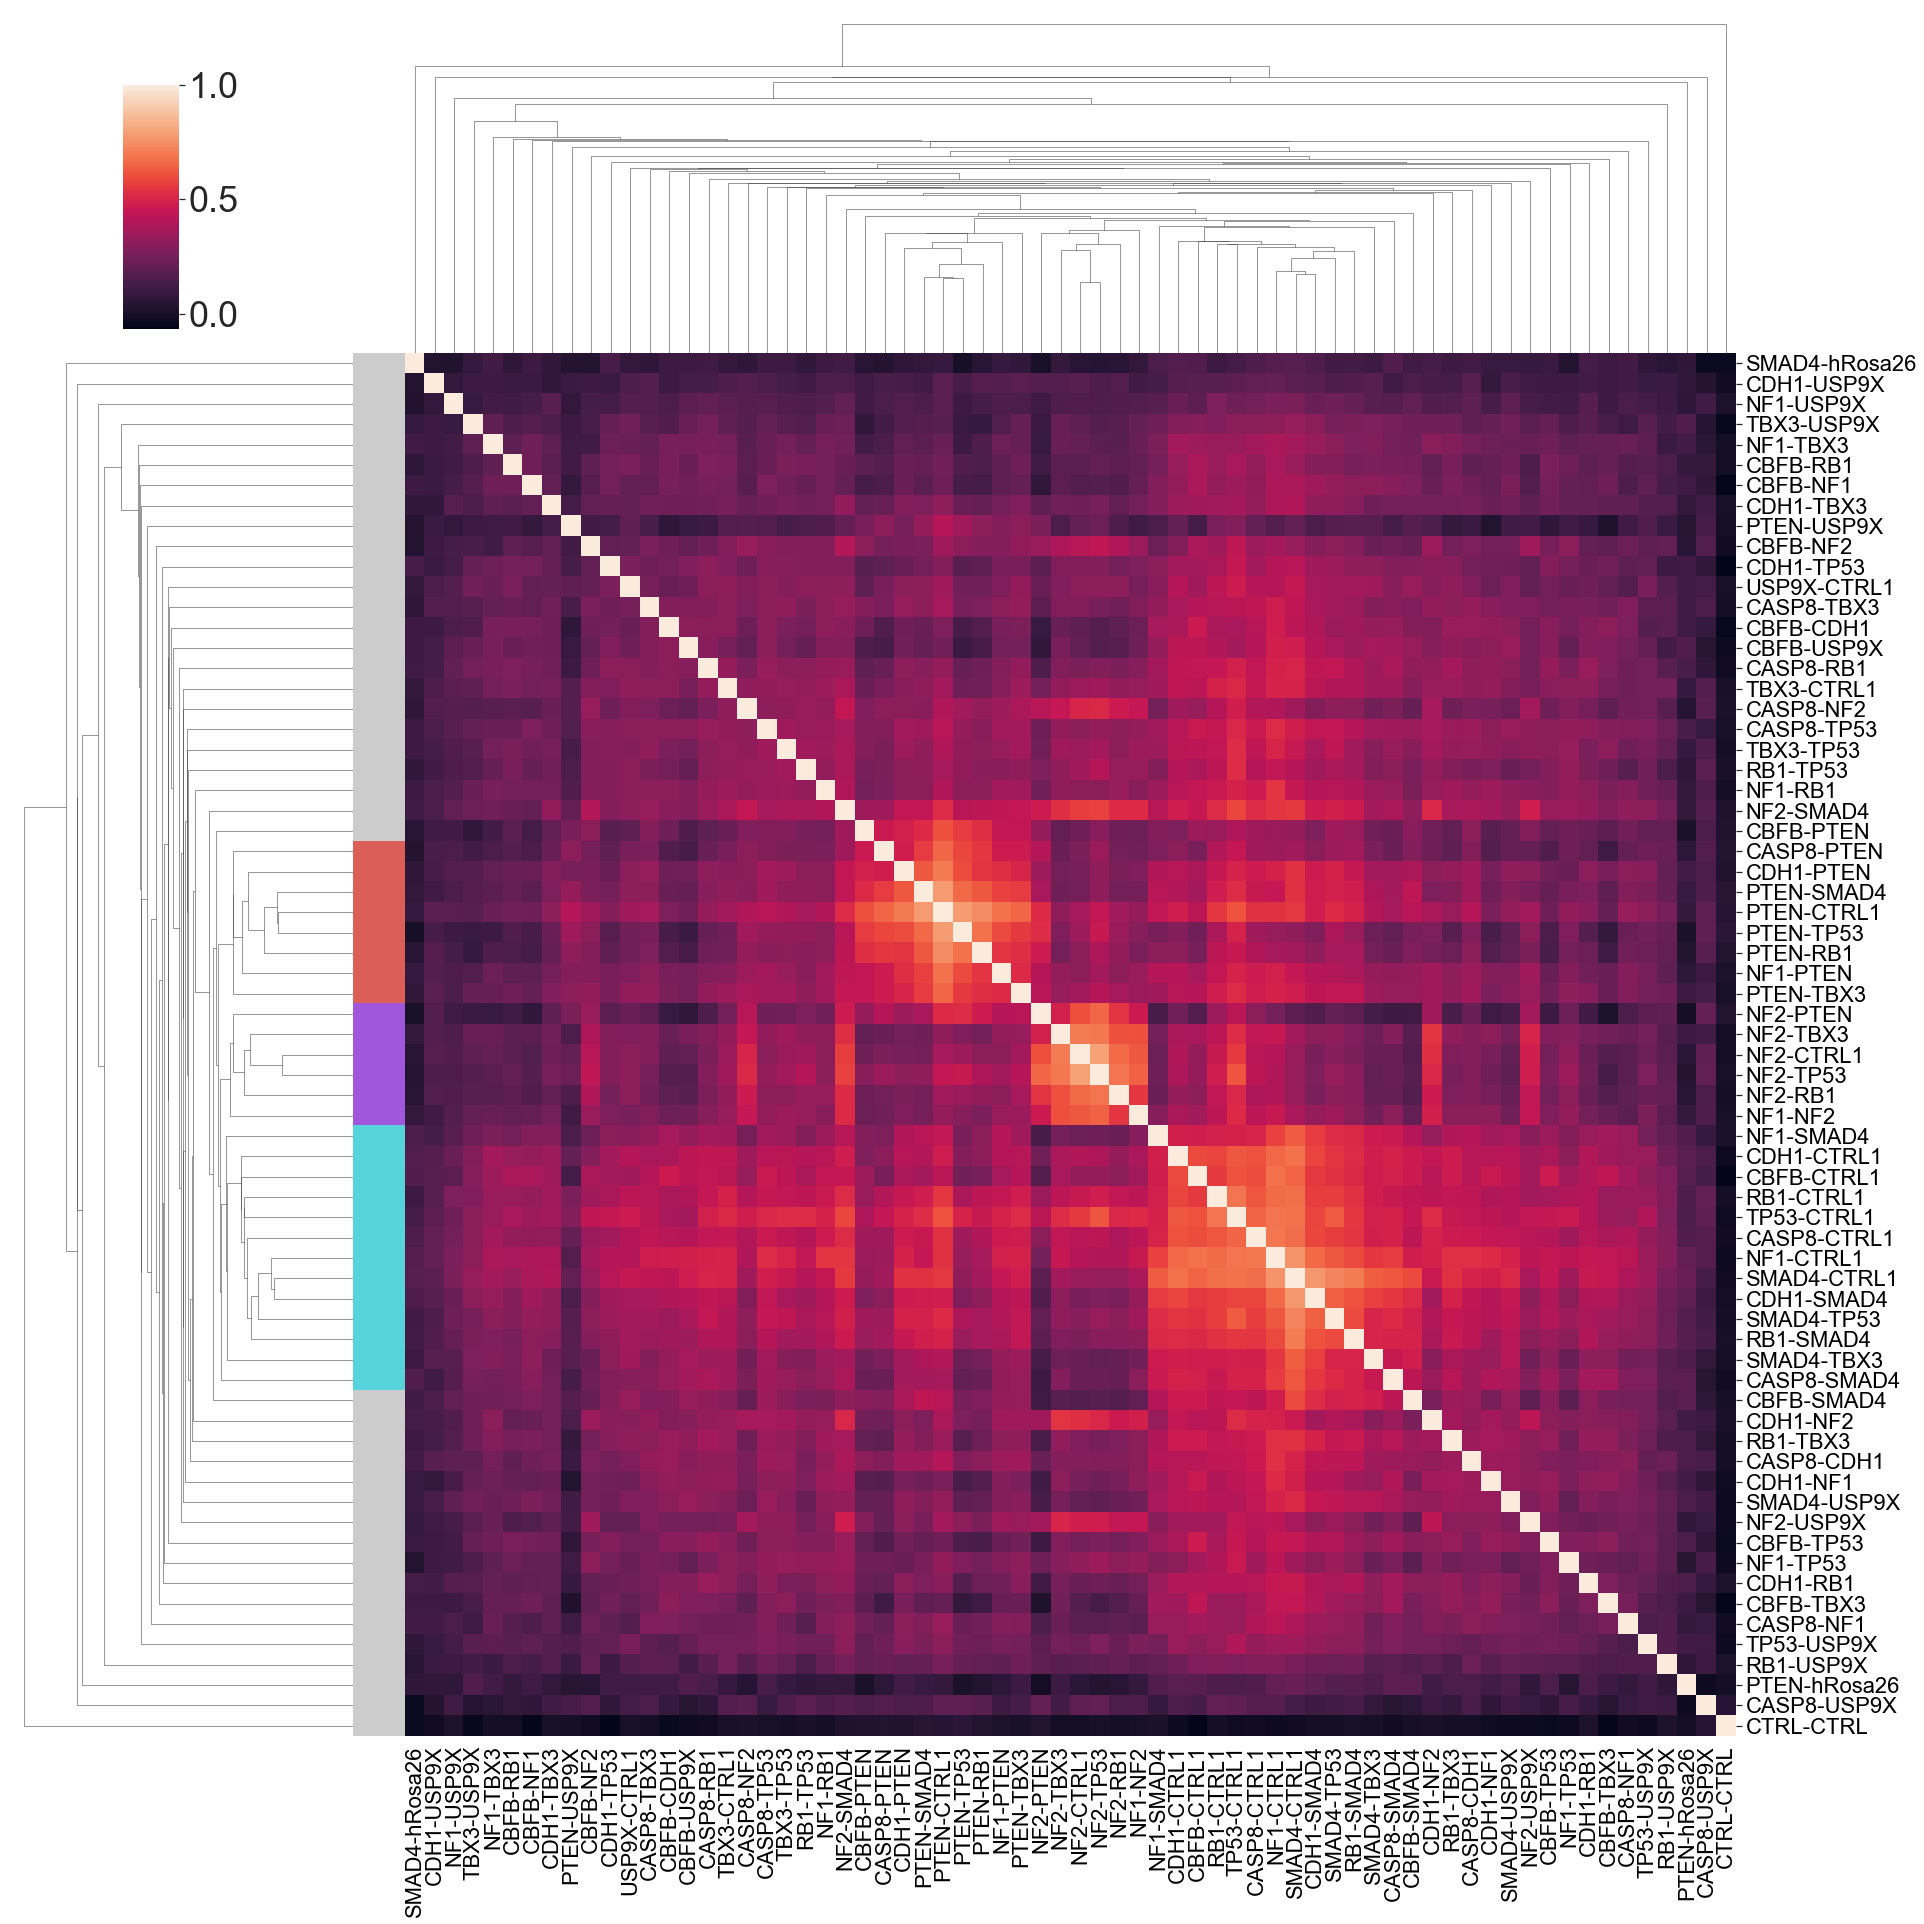

In [54]:
#**------------------------------------------Heatmap of clustering---------------------------------------------------**
from scipy.cluster.hierarchy import leaves_list, optimal_leaf_ordering
from scipy.spatial.distance import pdist, squareform
from sklearn.utils import shuffle
from matplotlib.colors import to_hex
D_corr = pdist(data, 'correlation')
Z_corr = clusterer.single_linkage_tree_.to_numpy()
Z_corr = optimal_leaf_ordering(Z_corr, D_corr)
labels = pd.Series(clusterer.labels_, index=data.index).sort_values()
clusters_in_order = labels.loc[data.index.values[leaves_list(Z_corr)]]

cluster_colors = list(map(to_hex, sns.color_palette('hls', labels.max()+2)))
cluster_colors = shuffle(cluster_colors)
cluster_color_mapper = dict(zip(sorted(labels.unique()), cluster_colors))
cluster_color_mapper[-1] = '#cccccc'
cluster_colors = clusters_in_order.map(lambda x: cluster_color_mapper[x])
sns.set(font_scale=1.2)
g = sns.clustermap(data.T.corr(),
               row_linkage=Z_corr, col_linkage=Z_corr,
               robust=False, figsize=[26,26], row_colors=cluster_colors)
#g.cax.set_size(0.5)
#g.ax_row_dendrogram.set_visible(False)
#g.ax_col_dendrogram.set_visible(False)
g.cax.set_position([.07, .82, .03, .13])
g.cax.tick_params(labelsize=36)
plt.setp(g.ax_heatmap.get_xticklabels(), fontsize = 22, color = "black")
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize = 22, color = "black")
plt.savefig('./sequencing/outs_S4/results/hdbscan_cluster_UMAP/heatmap_hdbscan_mean_expression.png', dpi=300)

#Add cluster labels into mean_pop4.cells
mean_pop4.cells["HDBSCAN_cluster_labels"] = clusterer.labels_

In [55]:
np.unique(cluster_colors)


array(['#57d3db', '#a157db', '#cccccc', '#db5f57'], dtype=object)

In [56]:
mean_pop4.cells

,num_cells,UMI_mean,num_targets,fitness1,fitness2,fitness,knock_outs,first_target,second_target,perturbed,DESeq2_de,HDBSCAN_cluster_labels
CASP8-CDH1,41,10213.2439,2,-0.0213,-0.0521,-0.0367,DKO,CASP8,CDH1,CASP8-CDH1,0.0000,-1
CASP8-CTRL1,211,9160.4313,1,-0.0365,-0.0214,-0.0289,SKO,CASP8,CTRL1,CASP8-CTRL1,0.0000,1
CASP8-NF1,24,9446.5833,2,-0.0268,-0.0459,-0.0363,DKO,CASP8,NF1,CASP8-NF1,0.0000,-1
CASP8-NF2,39,10649.7436,2,0.1710,0.1801,0.1756,DKO,CASP8,NF2,CASP8-NF2,8.0000,-1
CASP8-PTEN,51,11759.5882,2,0.1688,0.1637,0.1663,DKO,CASP8,PTEN,CASP8-PTEN,16.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
TBX3-TP53,55,10374.8364,2,0.0277,0.0536,0.0407,DKO,TBX3,TP53,TBX3-TP53,1.0000,-1
TBX3-USP9X,17,9076.5294,2,-0.1364,-0.2387,-0.1875,DKO,TBX3,USP9X,TBX3-USP9X,0.0000,-1
TP53-CTRL1,529,9140.9943,1,0.0508,0.0444,0.0476,SKO,TP53,CTRL1,TP53-CTRL1,4.0000,1
TP53-USP9X,25,10340.4800,2,-0.0601,-0.1201,-0.0901,DKO,TP53,USP9X,TP53-USP9X,0.0000,-1


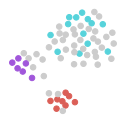

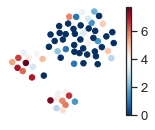

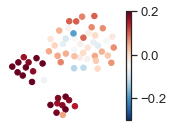

In [57]:
from umap import UMAP
sns.set(font_scale=1.2)
transformer = UMAP(metric='correlation',
                   n_neighbors=10,
                   min_dist=1,
                   spread=2,
                   random_state=4530)
coords = pd.DataFrame(transformer.fit_transform(data),
                      index=data.index,
                      columns=['x', 'y'])
coords['color'] = cluster_colors
coords['cluster'] = clusters_in_order
#coords.to_csv('./data_sharing/optimal_umap_layout.csv')
sns.set_style('white')
plt.figure(figsize=[2,2])
cg1 = plt.scatter(coords['x'], coords['y'], c=coords['color'], s=30)
plt.box(False)
plt.axis('off');
plt.savefig('./sequencing/outs_S4/results/hdbscan_cluster_UMAP/UMAP_cluster_mean_expression.png', dpi=300)

#-----------------------------Num of DEGs mapping on UMAP clusters-------------------------------------
#coords['transcription'] = mean_pop2.cells['fitness']    
coords['transcription'] = np.log2(mean_pop4.cells['DESeq2_de']+1)
#coords['transcription'] = mean_pop3.cells['DESeq2_de']
coords.head()
plt.figure(figsize=[2.5,2])
cg2 = plt.scatter(coords['x'],
            coords['y'],
            c=coords['transcription'],
            cmap=plt.cm.get_cmap('RdBu_r'),
            s=30)#, vmin=0, vmax=7)
plt.colorbar()
plt.axis('off');
#plt.title('fitness');
#plt.text(9, 17, "fitness", fontsize = 14)
plt.savefig('./sequencing/outs_S4/results/hdbscan_cluster_UMAP/UMAP_num_of_DEGs_mean_expression.png', dpi=300)

#-----------------------------Fitness mapping on UMAP clusters-------------------------------------
coords['fitness'] = mean_pop4.cells['fitness']
coords['fitness']
coords.head()
plt.figure(figsize=[2.5,2.])
cg2 = plt.scatter(coords['x'],
            coords['y'],
            c=coords['fitness'],
            cmap=plt.cm.get_cmap('RdBu_r'),
            s=30, vmin=-0.3, vmax=0.2)
plt.colorbar()
plt.axis('off');
#plt.title('fitness');
#plt.text(17.2, 2, "fitness", fontsize = 14)
plt.savefig('./sequencing/outs_S4/results/hdbscan_cluster_UMAP/UMAP_fitness_mean_expression.png', dpi=300)


# II. Transcriptomic changes underlie growth-based phenotypes in restricted conditions 

   **II_a. Correlation of fitnesses and transcriptomic changes:**
    
        Scatterplot of fitness versus number of differentially expressed genes (DEGs).
   
   **II_b. Correlation of fitnesses of extent of rescue of condition-induced DEGs:**

        a. TGFbeta1 induced DEGs : control cells in tgf medium vs. control in full medium at Day6.
        
           GF independence related DEGs: control cells in minimal medium vs. control in full medium at Day6.
        
        b. Scatterplot of fitnesses versus condition-induced DEGs


### II_a. Correlation of fitnesses and transcriptomic changes

In [59]:
mean_pop4.cells.query('knock_outs == "SKO"')

,num_cells,UMI_mean,num_targets,fitness1,fitness2,fitness,knock_outs,first_target,second_target,perturbed,DESeq2_de,HDBSCAN_cluster_labels
CASP8-CTRL1,211,9160.4313,1,-0.0365,-0.0214,-0.0289,SKO,CASP8,CTRL1,CASP8-CTRL1,0.0000,1
CBFB-CTRL1,235,8805.7830,1,0.0392,-0.0072,0.0160,SKO,CBFB,CTRL1,CBFB-CTRL1,29.0000,1
CDH1-CTRL1,171,8272.6023,1,-0.0490,-0.0381,-0.0436,SKO,CDH1,CTRL1,CDH1-CTRL1,0.0000,1
NF1-CTRL1,343,9390.1924,1,-0.0385,0.0013,-0.0186,SKO,NF1,CTRL1,NF1-CTRL1,15.0000,1
NF2-CTRL1,207,8790.2657,1,0.2163,0.1933,0.2048,SKO,NF2,CTRL1,NF2-CTRL1,135.0000,2
PTEN-CTRL1,697,9987.1607,1,0.1838,0.1768,0.1803,SKO,PTEN,CTRL1,PTEN-CTRL1,100.0000,0
RB1-CTRL1,257,8491.2996,1,-0.0237,-0.0145,-0.0191,SKO,RB1,CTRL1,RB1-CTRL1,0.0000,1
SMAD4-CTRL1,753,8392.0943,1,0.0700,0.1304,0.1002,SKO,SMAD4,CTRL1,SMAD4-CTRL1,52.0000,1
TBX3-CTRL1,98,8584.7857,1,-0.0468,0.0565,0.0049,SKO,TBX3,CTRL1,TBX3-CTRL1,0.0000,-1
TP53-CTRL1,529,9140.9943,1,0.0508,0.0444,0.0476,SKO,TP53,CTRL1,TP53-CTRL1,4.0000,1


(61, 12)
(0.24601888657332674, 0.055978155905121146)


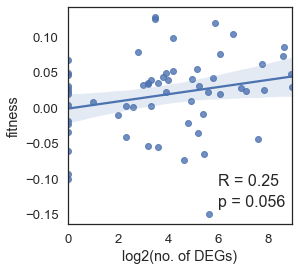

In [60]:
import scipy
df2 = mean_pop2.cells.query('num_cells > 10')
df2.to_csv('./sequencing/outs_S2/results/correlation_fitness_and_transcription/correlation_fitness_and_transcription_S2.csv')
df2 = df2.dropna(subset=['DESeq2_de','fitness']) #subset specifies column for checking NaNs
print(df2.shape)
plt.figure(figsize=(4,4))
sns.regplot(np.log2(df2['DESeq2_de']+1), df2['fitness'])
plt.xlabel("log2(no. of DEGs)")
print(scipy.stats.pearsonr(np.log2(df2['DESeq2_de']+1), df2['fitness']))
plt.text(6, -0.11, "R = 0.25", fontsize = 16)
plt.text(6, -0.14, "p = 0.056",fontsize = 16)
plt.savefig('./sequencing/outs_S2/results/correlation_fitness_and_transcription/correlation_fitness_and_transcription_S2.png', dpi = 300)

(53, 12)
(0.7033679500510615, 4.273237000565822e-09)


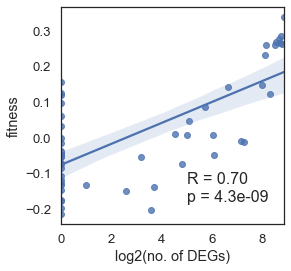

In [61]:
import scipy
df3 = mean_pop3.cells.query('num_cells > 10')
df3.to_csv('./sequencing/outs_S3/results/correlation_fitness_and_transcription/correlation_fitness_and_transcription_S3.csv')
df3 = df3.dropna(subset=['DESeq2_de','fitness']) #subset specifies column for checking NaNs
print(df3.shape)
plt.figure(figsize=(4,4))
sns.regplot(np.log2(df3['DESeq2_de']+1), df3['fitness'])
plt.xlabel("log2(no. of DEGs)")
print(scipy.stats.pearsonr(np.log2(df3['DESeq2_de']+1), df3['fitness']))
plt.text(5, -0.13, "R = 0.70", fontsize = 16)
plt.text(5, -0.18, "p = 4.3e-09",fontsize = 16)
plt.savefig('./sequencing/outs_S3/results/correlation_fitness_and_transcription/correlation_fitness_and_transcription_S3.png', dpi = 300)

(62, 12)
(0.8183001023563213, 4.627617900195496e-16)


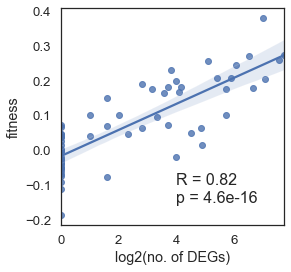

In [62]:
import scipy
df4 = mean_pop4.cells.query('num_cells > 10')
#df4 = mean_pop4.cells.query('DESeq2_de > 0')
df4.to_csv('./sequencing/outs_S4/results/correlation_fitness_and_transcription/correlation_fitness_and_transcription_S4.csv')
df4 = df4.dropna(subset=['DESeq2_de','fitness'])
print(df4.shape)
plt.figure(figsize=(4,4))
sns.regplot(np.log2(df4['DESeq2_de']+1), df4['fitness'])
plt.xlabel("log2(no. of DEGs)")
print(scipy.stats.pearsonr(np.log2(df4['DESeq2_de']+1), df4['fitness']))
plt.text(4, -0.1, "R = 0.82", fontsize = 16)
plt.text(4, -0.15, "p = 4.6e-16",fontsize = 16)

plt.savefig('./sequencing/outs_S4/results/correlation_fitness_and_transcription/correlation_fitness_and_transcription_S4.png', dpi = 300)

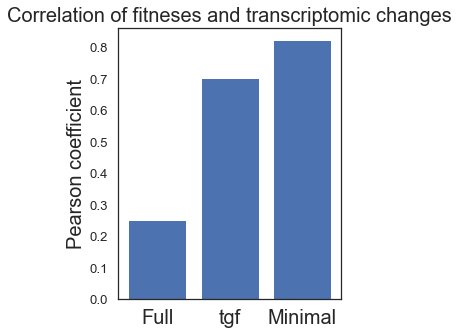

In [63]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(4,5))
# Make a fake dataset:
height = [0.25, 0.70, 0.82]
bars = ('Full',  'tgf','Minimal')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, fontsize = 20)
plt.xlabel('', fontsize = 20)
plt.ylabel('Pearson coefficient',fontsize = 20)
plt.title("Correlation of fitneses and transcriptomic changes", fontsize = 20) 
# Show graphic
#plt.show()

plt.savefig('./sequencing/Correlation of fitnesses and transcriptomic changes.png', dpi=300)


**------------------------------Number of DEGs in SKOs in full, tgf, minimal medium at D6-----------------------------------**

In [64]:
#Save number of DEGs into a csv file (figure will be made using ggplot2 in R)
num_DEGs = pd.concat([mean_pop2.cells.query('knock_outs == "SKO"')[['DESeq2_de']],
                      mean_pop3.cells.query('knock_outs == "SKO"')[['DESeq2_de']],
                      mean_pop4.cells.query('knock_outs == "SKO"')[['DESeq2_de']]])
num_DEGs['conditions'] = ['S2_full']*11 + ['S3_tgf']*11 + ['S4_min']*11
#num_DEGs.dropna(inplace = True)
num_DEGs.index.name = 'SKOs'
num_DEGs.to_csv('./sequencing/Results_S1234/num_DEGs.csv')

### II_b. Correlation of fitnesses of extent of rescue of condition-induced DEGs

In [65]:
#function of running DESeq2 comparing CTRL-CTRLs in different conditions
from diffexpr.py_deseq import py_DESeq2
def SampleB_vs_SampleA(popB, popA, perturbB = "CTRL-CTRL", perturbA = "CTRL-CTRL",threshold = 30 ,balance_representation = False, cell_num = 50):
    #top_genes = pop2.where(genes = 'mean > 0.1').columns
    #popB = popB.subpopulation(cells = 'num_guides == 2')
    df2 = popB.where(cells=('perturbed == ' + "\"" + perturbB + "\"")  ).T
    #df2_MM = df2.loc[top_genes,:]
    df2.columns = df2.columns + "B"
    print("Shape of matrix data in Sample B : {}".format(df2.shape))
    
    #popA = popA.subpopulation(cells = 'num_guides == 2')
    df1 = popA.where(cells=('perturbed == ' + "\"" + perturbA + "\"")).T
    #df1_MM = df1.loc[top_genes,:]
    df1.columns = df1.columns + "A"
    print("Shape of matrix data in Sample A : {}".format(df1.shape))
    
    if balance_representation:
        df1 = df1.sample(n=cell_num, axis= 1, replace=True, random_state=100)
        df2 = df2.sample(n=cell_num, axis= 1, replace = True, random_state = 100)
        data = df2.join(df1)

    else:
        data = df2.join(df1)
        
    data['sum'] = data.sum(axis = 1)
    data = data[data['sum'] >= threshold]
    #data.sort_values('sum', ascending = False, inplace = True)
    data.drop(['sum'], axis=1, inplace = True)
    #data = data[0:4000]
    print("Shape of data ready for DESeq2 : {}".format(data.shape))
    
    
    data.reset_index(inplace = True)
    data.columns = data.columns.map(lambda x: x.replace('-', '_'))
    
    #sample1 = perturbed.replace('-', '_')
    
    coldata = pd.DataFrame({'samples' : ['B_samples'] * df2.shape[1] + ['A_samples']*df1.shape[1] }, index = data.columns[1:])
    coldata['cell_barcode'] = coldata.index.values
    coldata.index = coldata['cell_barcode']
   
    #Generate Deseq2 object
    dds = py_DESeq2(count_matrix = data,
               design_matrix = coldata,
               design_formula = '~ samples',
               gene_column = 'gene_id') # <- telling DESeq2 this should be the gene ID column
    

    dds.run_deseq() 
    dds.get_deseq_result(contrast = ['samples', 'B_samples' , 'A_samples'])
    res = dds.deseq_result 
    lfc_res = dds.lfcShrink(coef = 2, method='apeglm')
    lfc_res.set_index('gene_id', inplace = True)
    
    #Results of Deseq2
    out = dict()
    out['name'] = "SampleB_vs_SampleA"
    out['gene_name'] = pd.Series(popB.gene_names(lfc_res.index), index=lfc_res.index, name=out['name'])
    out['baseMean'] = pd.Series(lfc_res['baseMean'], index=lfc_res.index, name=out['name'])
    out['LFC'] = pd.Series(lfc_res['log2FoldChange'], index=lfc_res.index, name=out['name'])
    out['lfcSE'] = pd.Series(lfc_res['lfcSE'], index=lfc_res.index, name=out['name'])
    out['pvalue'] = pd.Series(lfc_res['pvalue'], index=lfc_res.index, name=out['name'])
    out['padj'] = pd.Series(lfc_res['padj'], index=lfc_res.index, name=out['name'])

    #Normalized counts from Deseq2
    res = dict()
    res['name'] = out['name']
    cell_ids_sampleB = df2.columns.map(lambda x: x.replace('-', '_'))
    cell_ids_sampleA = df1.columns.map(lambda x: x.replace('-', '_'))
    res['normalized_count_SampleB'] = dds.normalized_count()[cell_ids_sampleB]
    res['normalized_count_SampleA'] = dds.normalized_count()[cell_ids_sampleA]
    return (out, res)
    

**------------------------------Control cells in S3 vs. Control cells in S2-----------------------------------**

In [66]:
control_S3_vs_S2 = SampleB_vs_SampleA(popB = pop3, popA = pop2, perturbB = "CTRL-CTRL", perturbA = "CTRL-CTRL", threshold = 40, balance_representation = False)



Shape of matrix data in Sample B : (16975, 53)
Shape of matrix data in Sample A : (16575, 137)
Shape of data ready for DESeq2 : (3468, 190)









-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)



INFO:DESeq2:Using contrast: ['samples', 'B_samples', 'A_samples']
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

INFO:DESeq2:Normalizing counts
INFO:DESeq2:Normalizing counts


Shape of control file: (3468, 6)
Shape of lfc file: (6332, 7)
Shape of res file: (3468, 2)
(-0.9118780076670325, 0.0)


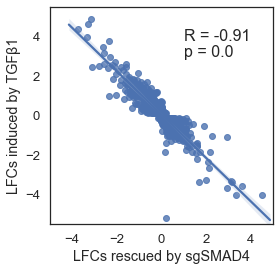

In [36]:
import scipy
#Get LFCs from DESeq2 results - control_S3_vs_S2
control_S3= pd.DataFrame(control_S3_vs_S2[0])
control_S3.set_index("gene_name", inplace = True)
control_S3.to_csv("./sequencing/outs_S3/results/res_Deseq2/res_S3_vs_S2.csv")
print("Shape of control file: {}".format(control_S3.shape))

#Get LFCs of all perturbations
lfc = pd.read_csv('./sequencing/outs_S3/results/res_Deseq2/res_SMAD4-CTRL1.csv', index_col=0)
lfc.set_index("gene_id")
print("Shape of lfc file: {}".format(lfc.shape))

#Merge two LFC data above
res = pd.merge(control_S3[["LFC"]], lfc[["LFC"]], left_index=True, right_index = True)
res.columns = ["S3_vs_S2","SMAD4-CTRL1"]
print("Shape of res file: {}".format(res.shape))
res = res[np.abs(res['S3_vs_S2'])>  0.1]
plt.figure(figsize=(4,4))
sns.regplot(res['SMAD4-CTRL1'], res['S3_vs_S2'])
plt.xlim(-5,5)
plt.ylim(-5.5,5.5)
plt.xlabel("LFCs rescued by sgSMAD4")
plt.ylabel("LFCs induced by TGFβ1")
plt.text(1, 3.8, "R = -0.91", fontsize = 16)
plt.text(1, 3, "p = 0.0",fontsize = 16)
print(scipy.stats.pearsonr(res['SMAD4-CTRL1'], res['S3_vs_S2']))
plt.show()

**------------------------------Control cells in S4 vs. Control cells in S2-----------------------------------**

In [37]:
control_S4_vs_S2 = SampleB_vs_SampleA(popB = pop4, popA = pop2, perturbB = "CTRL-CTRL", perturbA = "CTRL-CTRL", threshold = 40, balance_representation = False)


Shape of matrix data in Sample B : (16915, 155)
Shape of matrix data in Sample A : (16575, 137)
Shape of data ready for DESeq2 : (4238, 292)









-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)



INFO:DESeq2:Using contrast: ['samples', 'B_samples', 'A_samples']
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895

INFO:DESeq2:Normalizing counts
INFO:DESeq2:Normalizing counts


Shape of control file: (4238, 6)
Shape of lfc file: (5069, 7)
Shape of res file: (4141, 2)
(-0.0023777461172469344, 0.8986646468962912)


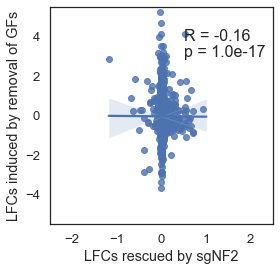

In [38]:
import scipy
#Get LFCs from DESeq2 results - control_S4_vs_S2
control_S4= pd.DataFrame(control_S4_vs_S2[0])
control_S4.set_index("gene_name", inplace = True)
control_S4.to_csv("./sequencing/outs_S4/results/res_Deseq2/res_S4_vs_S2.csv")
print("Shape of control file: {}".format(control_S4.shape))

#Get LFCs of all perturbations
lfc = pd.read_csv('./sequencing/outs_S4/results/res_Deseq2/res_PTEN-CTRL1.csv', index_col=0)
lfc.set_index("gene_id")
print("Shape of lfc file: {}".format(lfc.shape))

#Merge two LFC data above
res = pd.merge(control_S4[["LFC"]], lfc[["LFC"]], left_index=True, right_index = True)
res.columns = ["S4_vs_S2","NF2-CTRL1"]
print("Shape of res file: {}".format(res.shape))
res = res[np.abs(res['S4_vs_S2'])>  0.1]
plt.figure(figsize=(4,4))
sns.regplot(res['NF2-CTRL1'], res['S4_vs_S2'])
plt.xlim(-2.5,2.5)
plt.ylim(-5.5,5.5)
plt.xlabel("LFCs rescued by sgNF2")
plt.ylabel("LFCs induced by removal of GFs")
plt.text(0.5, 3.8, "R = -0.16", fontsize = 16)
plt.text(0.5, 3, "p = 1.0e-17",fontsize = 16)
print(scipy.stats.pearsonr(res['NF2-CTRL1'], res['S4_vs_S2']))
plt.show()

Over!